# 4TIN811U Machine Learning & Deep Learning
# TP 10 - Arbres de décision, de régression & random forests

## 1. Pommes

On reprend le dataset `tp12/dataset_tp9_apples.npy` utilisé dans le TP 9 (qualité des pommes).
Lire la documentation de [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en prêtant une attention particulière aux paramètres possibles (beaucoup de ces paramètres ont été discutés en cours).

Séparez les données entre données d'entraînement et données de validation. Entraîner une random forest sur les données d'entraînement, et donnez son accuracy 1) sur les données d'entraînement et 2) données de validation. 

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = np.load("dataset_tp9_apples.npy")
np.random.shuffle(data)

X_train, y_train = data[:int(len(data)*0.8), :-1], data[:int(len(data)*0.8), -1:]
X_val, y_val = data[int(len(data)*0.8):, :-1], data[int(len(data)*0.8):, -1:]

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=1000, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
print("Prédiction des données d'entrainement")
y_pred_forest = forest_model.predict(X_train)
print(classification_report(y_train, y_pred_forest))

print("Prédiction des données de validation")
y_pred_forest = forest_model.predict(X_val)
print(classification_report(y_val, y_pred_forest))

/Users/gabrielmariebrisson/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Prédiction des données d'entrainement
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1579
         1.0       1.00      1.00      1.00      1621

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200

Prédiction des données de validation
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       417
         1.0       0.84      0.89      0.86       383

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



Faites varier le nombre d'arbres dans la forêt. Quelle influence observez-vous sur les résultats précédents ? À quoi celà est-il dû ?

Je constate que plus il y a d'arbre, plus il sera précis, et il y aura moins d'overfeating, car il sera plus generaliste 

In [25]:
#Pour 10 n_estimators

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
print("Prédiction des données d'entrainement")
y_pred_forest = forest_model.predict(X_train)
print(classification_report(y_train, y_pred_forest))

print("Prédiction des données de validation")
y_pred_forest = forest_model.predict(X_val)
print(classification_report(y_val, y_pred_forest))

Prédiction des données d'entrainement
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1579
         1.0       1.00      0.99      0.99      1621

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200

Prédiction des données de validation
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       417
         1.0       0.86      0.84      0.85       383

    accuracy                           0.85       800
   macro avg       0.86      0.85      0.85       800
weighted avg       0.86      0.85      0.85       800



/Users/gabrielmariebrisson/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
#Pour 3 n_estimators

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=1, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
print("Prédiction des données d'entrainement")
y_pred_forest = forest_model.predict(X_train)
print(classification_report(y_train, y_pred_forest))

print("Prédiction des données de validation")
y_pred_forest = forest_model.predict(X_val)
print(classification_report(y_val, y_pred_forest))

Prédiction des données d'entrainement
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1579
         1.0       0.91      0.93      0.92      1621

    accuracy                           0.92      3200
   macro avg       0.92      0.92      0.92      3200
weighted avg       0.92      0.92      0.92      3200

Prédiction des données de validation
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       417
         1.0       0.77      0.79      0.78       383

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



/Users/gabrielmariebrisson/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## 2. Vroum

On considère le dataset `cars_multi.csv`, issues de https://github.com/RodolfoViana/exploratory-data-analysis-dataset-cars/tree/master. On n'utilisera pas les colonnes `ID` et `car_name`. On pourra aussi retirer les quelques lignes comportant des données manquantes. On souhaite prédire la donnée mpg (miles per galon : distance parcourue par quantité d'essence) selon les autres colonnes. Utilisez [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](sklearn.ensemble.RandomForestRegressor) pour votre régression.

Affichez l'évolution de la variance (on fait plusieurs expériences : la variance est alors la moyenne des normes entre le vecteur prédit par chacune des expériences et la moyenne de ces expériences). Commentez.

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

dataset = pd.read_csv("cars_multi.csv").dropna()
dataset = dataset.drop(['ID', 'car_name'], axis=1)
dataset = dataset.sample(frac=1, random_state=42)

dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')
dataset = dataset.dropna()

X_train, y_train = dataset.iloc[:int(len(dataset)*0.8), 1:], dataset.iloc[:int(len(dataset)*0.8), 0]
X_val, y_val = dataset.iloc[int(len(dataset)*0.8):, 1:], dataset.iloc[int(len(dataset)*0.8):, 0]

In [69]:
# Nombre d'expériences
num_experiments = (50)
predictions = np.zeros((len(X_val), num_experiments))

# Entraîner et prédire avec plusieurs modèles
for i in range(num_experiments):
    forest_model = RandomForestRegressor(n_estimators=1000, random_state=i)
    forest_model.fit(X_train, y_train)

    y_pred = forest_model.predict(X_val)
    predictions[:, i] = y_pred

avg_y = np.mean(predictions, axis = 1)

variance_tab = []
for i in range(num_experiments):
    variance_tab += [np.linalg.norm(avg_y - predictions[:,i])]
    
variance = sum(variance_tab) / len(variance_tab)
print(variance)

0.7601503345531703


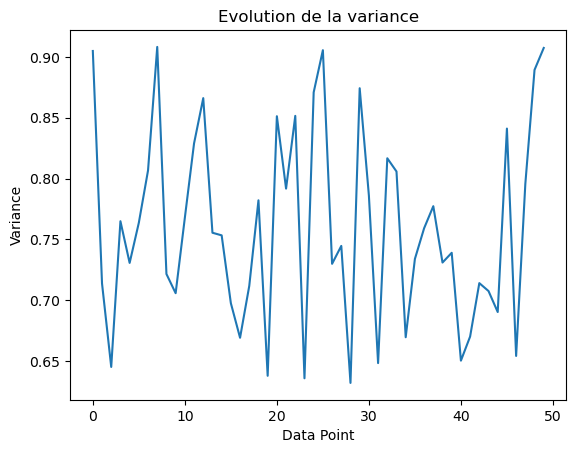

In [70]:
plt.plot(variance_tab)
plt.xlabel('Data Point')
plt.ylabel('Variance')
plt.title('Evolution de la variance')
plt.show()

## 3. Données manquantes (optionnel)

Implémentez l'algorithme vu en cours pour estimer la valeur des données manquantes dans le dataset `cars_multi.csv`. On pourra utiliser https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier pour savoir comment accéder aux nœuds prédits par un arbre d'une forêt, et ainsi calculer la matrice de proximité.